# FashionGen Dataset

- 官网： [https://www.fashion-gen.com/](https://www.fashion-gen.com/)
- Paper: [Fashion-Gen: The Generative Fashion Dataset and Challenge](https://arxiv.org/pdf/1806.08317.pdf)
- 相关代码： [FashionGenAttnGAN](https://github.com/menardai/FashionGenAttnGAN)

FashionGen 数据集下载需要注册并联系申请。下载后的数据集包含两个文件：  
- fashiongen_256_256_train.h5 (13.3G)
- fashiongen_256_256_validation.h5 (1.66G)

In [1]:
import os
import h5py
import numpy as np

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 文件读取

In [2]:
data_dir = '/home/OpenResource/Datasets/FashionGEN'

train_h5_filename = os.path.join(data_dir, 'fashiongen_256_256_train.h5')
test_h5_filename = os.path.join(data_dir, 'fashiongen_256_256_validation.h5')

train_file_h5 = h5py.File(train_h5_filename, mode='r')
test_file_h5 = h5py.File(test_h5_filename, mode='r')

## 关键字检测

In [5]:
train_file_h5.keys()

<KeysViewHDF5 ['index', 'index_2', 'input_brand', 'input_category', 'input_composition', 'input_concat_description', 'input_department', 'input_description', 'input_gender', 'input_image', 'input_msrpUSD', 'input_name', 'input_pose', 'input_productID', 'input_season', 'input_subcategory']>

- index, 
- index_2, 
- input_brand 品牌， 
- input_category 服装类别， 
- input_composition， 服装成分,  
- input_concat_description 一长串的描述，几句话   
- input_department 哪一部分，是‘CLOTHING’还是 ‘ACCESSORIES’、‘BAGS’等  
- input_description 相对input_concat_description较简洁有效的描述  
- input_gender 性别  
- input_image 图像， (260490, 256, 256, 3)， 0-255   
- input_msrpUSD What is it?*  
- input_name 带颜色和款式的name  
- input_pose 字符串，不是关键点，标记姿态，每张图片有四个姿态  
- input_productID   
- input_season  
- input_subcategory 款式

注意： 所有字符串都是带编码格式的，使用 .decode('utf-8', errors='ignore') 转回不带格式的字符串

## 统计数据量

In [4]:
print(len(train_file_h5['input_description']))
print(len(test_file_h5['input_description']))

260490
32528


## 统计类别数量及图片数量

In [ ]:
category = list()
for i in range(260490):
    category.append(train_file_h5['input_category'][i][0].decode('utf-8'))

In [10]:
category = list()
for i in range(32528):
    category.append(test_file_h5['input_category'][i][0].decode('utf-8'))

In [11]:
# 统计类别数量
len(list(set(category)))

45

In [12]:
# 每个类别下的图片数量统计
from collections import Counter
Counter(category)

Counter({'JACKETS & COATS': 4357,
         'JEANS': 1694,
         'PANTS': 2910,
         'SHIRTS': 1418,
         'DRESSES': 1184,
         'SUITS & BLAZERS': 355,
         'SWEATERS': 5602,
         'SHORTS': 925,
         'TIES': 30,
         'TOPS': 5944,
         'HATS': 571,
         'SKIRTS': 872,
         'JUMPSUITS': 78,
         'SWIMWEAR': 26,
         'SCARVES': 151,
         'LINGERIE': 161,
         'BELTS & SUSPENDERS': 45,
         'CLUTCHES & POUCHES': 152,
         'SHOULDER BAGS': 867,
         'FINE JEWELRY': 57,
         'BACKPACKS': 349,
         'FLATS': 476,
         'BOOTS': 570,
         'JEWELRY': 603,
         'SNEAKERS': 1306,
         'SANDALS': 443,
         'BRIEFCASES': 11,
         'SOCKS': 33,
         'TOTE BAGS': 279,
         'LOAFERS': 60,
         'MESSENGER BAGS & SATCHELS': 65,
         'HEELS': 238,
         'DUFFLE & TOP HANDLE BAGS': 192,
         'KEYCHAINS': 24,
         'MESSENGER BAGS': 12,
         'LACE UPS': 78,
         'BLANKETS': 

Counter({'SHIRTS': 11398,  
         'SWEATERS': 44591,  
         'JEANS': 13586,  
         'PANTS': 23230,  
         'TOPS': 47764,  
         'SUITS & BLAZERS': 2845,  
         'SHORTS': 7416,   
         'JACKETS & COATS': 35035,  
         'TIES': 253,  
         'HATS': 4545,  
         'SKIRTS': 6909,  
         'JUMPSUITS': 610,  
         'SWIMWEAR': 201,  
         'DRESSES': 9458,  
         'BELTS & SUSPENDERS': 335,  
         'LINGERIE': 1314,  
         'SCARVES': 1138,  
         'GLOVES': 66,  
         'FINE JEWELRY': 475,   
         'CLUTCHES & POUCHES': 1120,  
         'BLANKETS': 17,  
         'JEWELRY': 4933,  
         'BACKPACKS': 2858,  
         'SHOULDER BAGS': 6952,  
         'UNDERWEAR & LOUNGEWEAR': 23,  
         'KEYCHAINS': 202,  
         'TOTE BAGS': 2281,   
         'BOAT SHOES & MOCCASINS': 12,  
         'POUCHES & DOCUMENT HOLDERS': 121,  
         'SNEAKERS': 10478,  
         'DUFFLE & TOP HANDLE BAGS': 1533,  
         'EYEWEAR': 2494,  
         'BOOTS': 4515,  
         'FLATS': 3855,  
         'LACE UPS': 631,  
         'MONKSTRAPS': 29,  
         'LOAFERS': 481,   
         'SOCKS': 250,  
         'POCKET SQUARES & TIE BARS': 23,   
         'SANDALS': 3515,  
         'HEELS': 1931,  
         'MESSENGER BAGS & SATCHELS': 530,  
         'ESPADRILLES': 119,  
         'DUFFLE BAGS': 120,  
         'BAG ACCESSORIES': 110,  
         'TRAVEL BAGS': 29,  
         'MESSENGER BAGS': 88,  
         'BRIEFCASES': 71})  

## 标注字符串读取示例

In [13]:
train_file_h5['input_category'][78777][0].decode('utf-8')

'TOPS'

In [5]:
train_file_h5['input_description'][0][0].decode('utf-8')

'Long sleeve coated denim shirt in indigo blue. Irregular overdye effect throughout in black. Spread collar. Flap pockets at breast, one with metallic logo piece. Press-stud closure at front. Tonal stitching. Three press-studs at barrel cuffs.'

In [6]:
train_file_h5['input_concat_description'][0][0].decode('utf-8')

'Long sleeve coated denim shirt in indigo blue. Irregular overdye effect throughout in black. Spread collar. Flap pockets at breast, one with metallic logo piece. Press-stud closure at front. Tonal stitching. Three press-studs at barrel cuffs. Long sleeve suede jacket in black. Tonal grained leather paneling throughout. Stand collar. Zip closure and zippered welt pockets at front. Zippered vents at back hem. Welt pockets at interior. Fully lined. Tonal stitching. Zippered expansion panels at sleeve cuffs. Slim-fit cropped pleated wool trousers in black. Four-pocket styling. Tonal stitching. Button-fly.'

## 图片显示

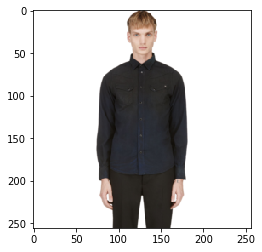

In [22]:
imshow(train_file_h5['input_image'][0].astype(uint8))

In [14]:
import random

In [21]:
idx = [random.randint(0,260490) for _ in range(9)]

In [23]:
import matplotlib.pylab as plt

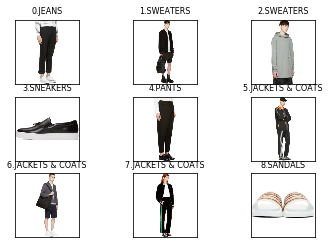

In [36]:
for i in range(9):
    ii = idx[i]
    img = train_file_h5['input_image'][ii].astype(uint8)
#     title=train_file_h5['input_description'][ii][0].decode('utf-8', errors='ignore') 
    title = train_file_h5['input_category'][ii][0].decode('utf-8')
    title = f'{i}.{title}'
    #行，列，索引
    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.title(title,fontsize=8)
    plt.xticks([])
    plt.yticks([])
# plt.show()
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.savefig('./img.png')

In [37]:
for i in range(9):
    ii = idx[i]
    title = train_file_h5['input_category'][ii][0].decode('utf-8')
    caption=train_file_h5['input_description'][ii][0].decode('utf-8', errors='ignore') 
    print(f'{i}-{ii}-{title}: {caption}')

0-152775-JEANS: Straight-leg Japanese denim jeans in black. Four-pocket styling. Raw edge at cuffs. Zip-fly. Tonal stitching. Approx. 6.75" leg opening.
1-80627-SWEATERS: Long sleeve jacquard knit bomber jacket in black. Rib knit stand collar, cuffs, and hem. Concealed zip closure with press-stud placket at front. Welt pockets at waist. Raglan sleeves. Asymmetric hem. Unlined. Tonal stitching.
2-82295-SWEATERS: Long sleeve hoodie in 'hustler' grey. Beige drawstring at hood. Ribbed sleeve cuffs. Fleece lining. Tonal stitching.
3-155846-SNEAKERS: Buffed leather slip-on sneakers in black. Round toe. Signature safety pin hardware at vamp. Elasticized gusset at sides of tongue. Padded collar. Treaded rubber sole in white featuring rubberized logo at heel. Silver-tone hardware. Tonal stitching.
4-12381-PANTS: Cropped relaxed-fit sarouel pants in black. Four-pocket styling. Elasticized waistband with tonal drawstring. Pleat feature at kneecaps. Tonal stitching.
5-157450-JACKETS & COATS: Long 